# YOLO-V11 DETECTION MODEL

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.2/915.2 kB 24.3 MB/s eta 0:00:0000:01


download the dataset from here and upload it to kaggle also the dataset is in YOLOV11 FORMAT
--->   
https://app.roboflow.com/ds/jWMXpvp7fQ?key=tK6TiV80NK

In [3]:
from ultralytics import YOLO

model=YOLO("yolo11m.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 38.8M/38.8M [00:00<00:00, 348MB/s]


In [ ]:
# Train the model
train_results = model.train(
    data="/kaggle/DATASET/data.yaml", # path to dataset YAML(pvseg-high-zoom-nl-v1-g2en9/data.yaml)
    epochs=200,  # number of training epochs
    imgsz=624,  # training image size
    device="0",  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

In [4]:
# After training, you can find the best.pt weight and provide the path here, or use an already trained model
# Here alreary pretrained model is being used
model=YOLO("/kaggle/input/yolov11-detection/pytorch/default/1/best (1).pt")

**Testing the model on Test data**


Processing: 4.png

image 1/1 /kaggle/input/testing-images/testing imgs/4.png: 576x832 3 solarpanels, 20.4ms
Speed: 2.9ms preprocess, 20.4ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 832)


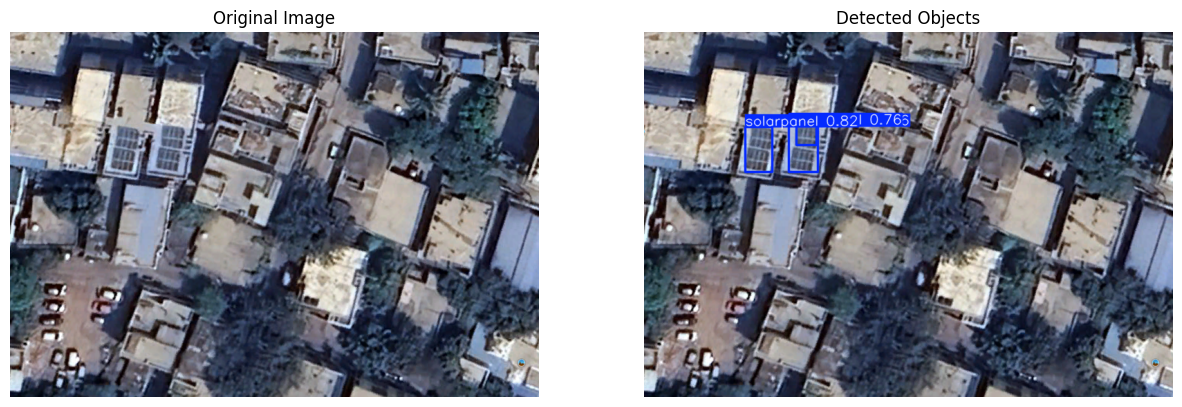


Processing: 1.png

image 1/1 /kaggle/input/testing-images/testing imgs/1.png: 832x832 8 solarpanels, 27.1ms
Speed: 3.8ms preprocess, 27.1ms inference, 1.2ms postprocess per image at shape (1, 3, 832, 832)


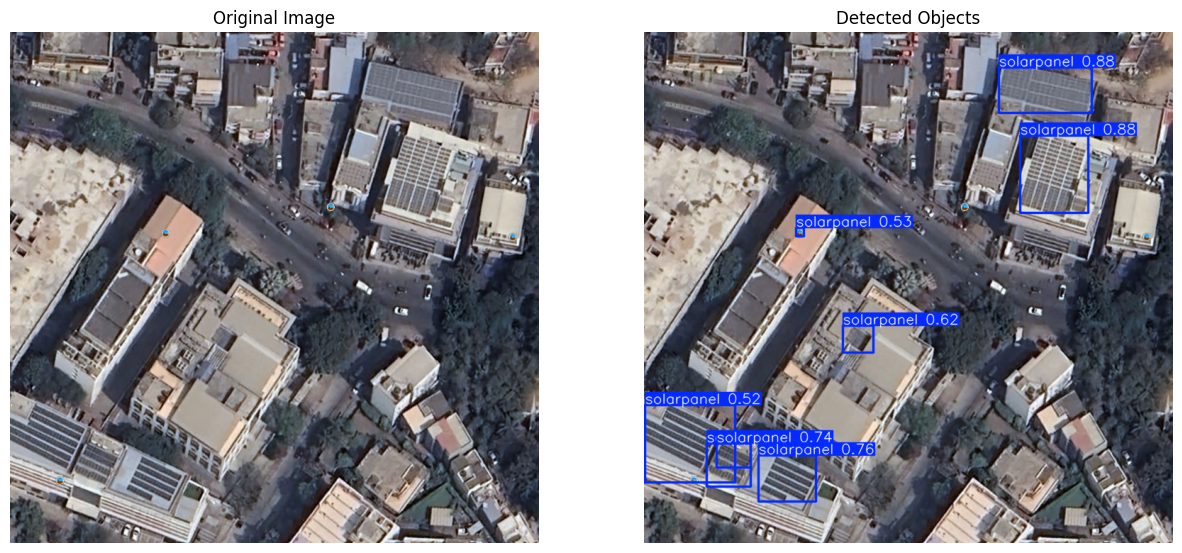


Processing: 2.png

image 1/1 /kaggle/input/testing-images/testing imgs/2.png: 704x832 3 solarpanels, 24.0ms
Speed: 3.1ms preprocess, 24.0ms inference, 1.2ms postprocess per image at shape (1, 3, 704, 832)


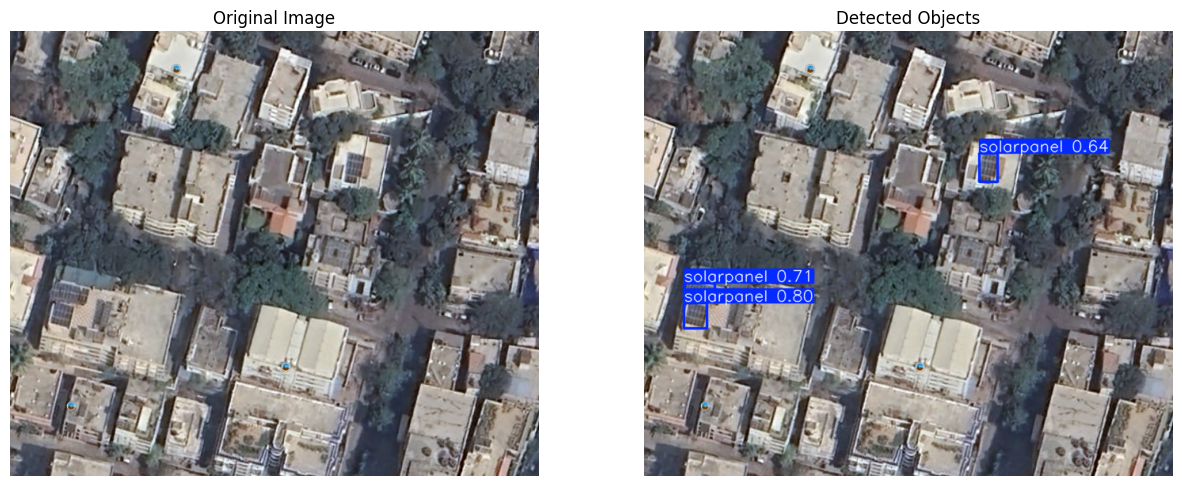


Processing: 5.png

image 1/1 /kaggle/input/testing-images/testing imgs/5.png: 608x832 4 solarpanels, 21.9ms
Speed: 3.0ms preprocess, 21.9ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 832)


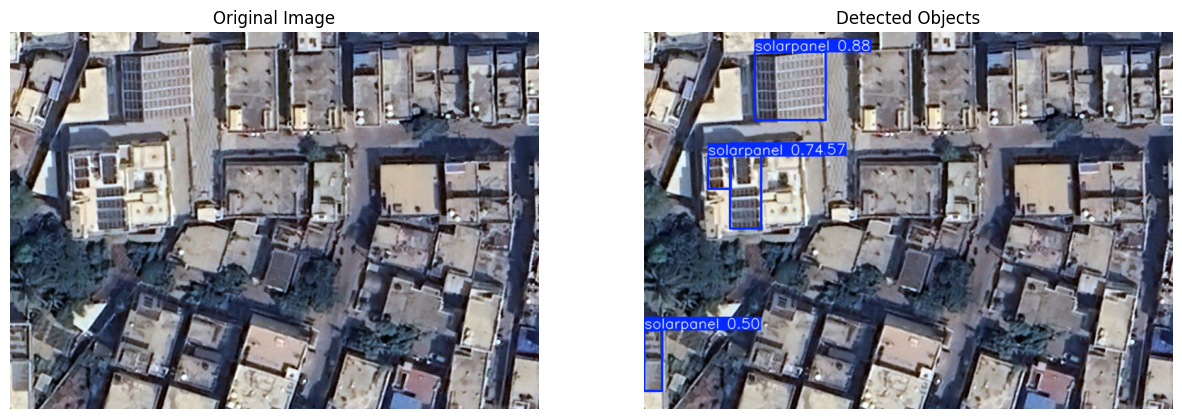


Processing: 3.png

image 1/1 /kaggle/input/testing-images/testing imgs/3.png: 800x832 9 solarpanels, 25.7ms
Speed: 3.5ms preprocess, 25.7ms inference, 1.2ms postprocess per image at shape (1, 3, 800, 832)


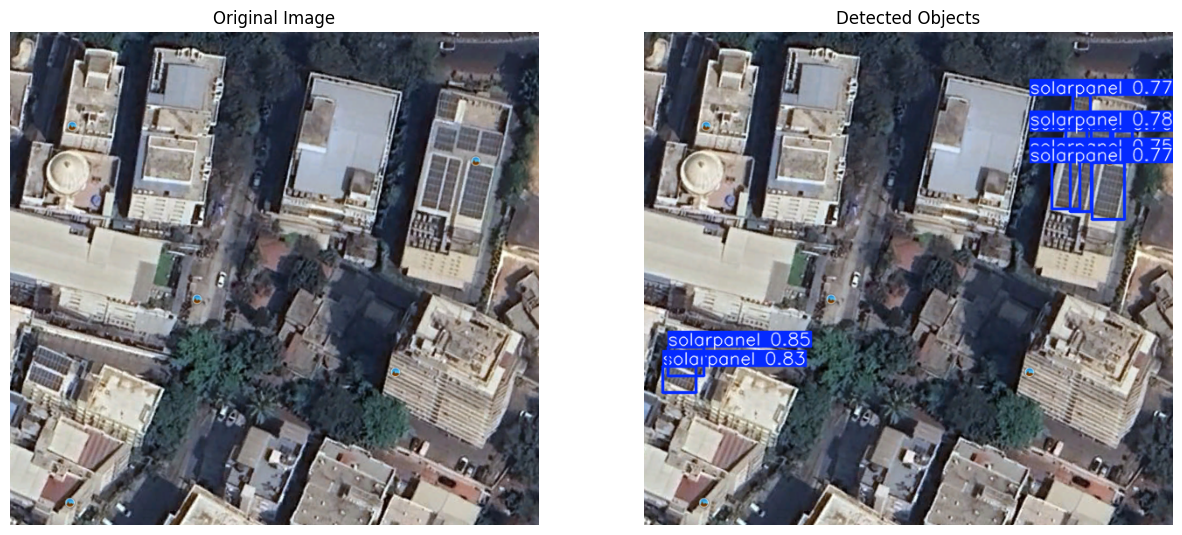


Processing: 6.png

image 1/1 /kaggle/input/testing-images/testing imgs/6.png: 576x832 2 solarpanels, 21.2ms
Speed: 2.8ms preprocess, 21.2ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 832)


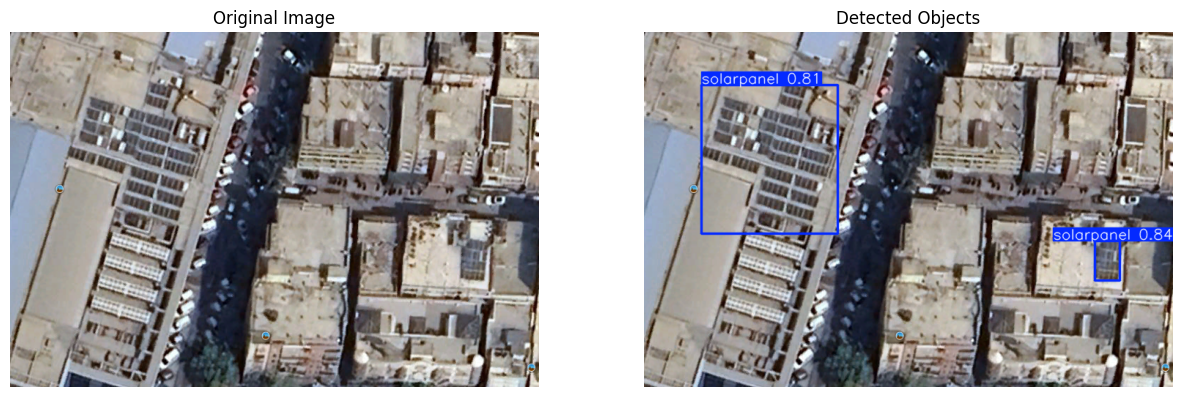

In [8]:
import os
import random
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


def process_folder(folder_path, model):
    import os
    
    # Get all image files from folder
    image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) 
                   if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
    
    for image_path in image_files:
        print(f"\nProcessing: {os.path.basename(image_path)}")
        
        # Read image using matplotlib
        original_img = plt.imread(image_path)
        
        # Get prediction
        results = model(image_path)
        predicted_img = results[0].plot()
        
        # Convert predicted image from BGR to RGB if needed
        if len(predicted_img.shape) == 3 and predicted_img.shape[2] == 3:
            predicted_img = cv2.cvtColor(predicted_img, cv2.COLOR_BGR2RGB)
        
        # Plot side by side
        plt.figure(figsize=(15,7))
        
        # Original image
        plt.subplot(1, 2, 1)
        plt.imshow(original_img)
        plt.title('Original Image')
        plt.axis('off')
        
        # Predicted image
        plt.subplot(1, 2, 2)
        plt.imshow(predicted_img)
        plt.title('Detected Objects')
        plt.axis('off')
        
        plt.show()

# Process entire folder
folder_path = "/kaggle/input/testing-images/testing imgs"
process_folder(folder_path, model)
